# Linear Algebra Project
# *Data masking*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goals" data-toc-modified-id="Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goals</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Input-data" data-toc-modified-id="Input-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Input data</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Column-names" data-toc-modified-id="Column-names-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Column names</a></span></li><li><span><a href="#Data-type-change" data-toc-modified-id="Data-type-change-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Data type change</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Duplicates</a></span></li></ul></li><li><span><a href="#Theoretical-proof" data-toc-modified-id="Theoretical-proof-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Theoretical proof</a></span></li><li><span><a href="#Linear-regression-implementation" data-toc-modified-id="Linear-regression-implementation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Linear regression implementation</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Algorithm-testing" data-toc-modified-id="Algorithm-testing-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Algorithm testing</a></span><ul class="toc-item"><li><span><a href="#Original-features-LR-implementation" data-toc-modified-id="Original-features-LR-implementation-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Original features LR implementation</a></span></li><li><span><a href="#Original-features-LR-sklearn" data-toc-modified-id="Original-features-LR-sklearn-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Original features LR sklearn</a></span></li><li><span><a href="#Masked-features-LR-implementation" data-toc-modified-id="Masked-features-LR-implementation-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Masked features LR implementation</a></span></li><li><span><a href="#Masked-features-LR-sklearn" data-toc-modified-id="Masked-features-LR-sklearn-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Masked features LR sklearn</a></span></li></ul></li></ul></div>

## Goals

- Develop a data transforming algorithm  for the Sure Tomorrow insurance company that would make it hard to recover personal information from the transformed data;
- Prove that the algorithm works correctly; 
- The data should be protected in such a way that the quality of machine learning models doesn't suffer.

## Data description

- **Features:** insured person's gender, age, salary, and number of family members.
- **Target:** number of insurance benefits received by the insured person over the last five years.

## Imports

In [18]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import re

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option('display.max_rows', None, 'display.max_columns', None)

print("Setup Complete")

Setup Complete


## Input data

In [3]:
try:
    df = pd.read_csv('insurance_us.csv')
    
except:
    df = pd.read_csv('/datasets/insurance_us.csv')

## Descriptive statistics

In [4]:
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Notes for preprocessing:
- Convert `Age` column to integers;
- The target is categorical, it's a classification task in essence but we will use linear regression for the task's sake (despite the quality of such a model).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Notes for preprocessing:
- There are 5000 observations with 4 features and 1 target variables;
- Column names should be converted to lower case;
- No missing values.

In [6]:
df.describe()

,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


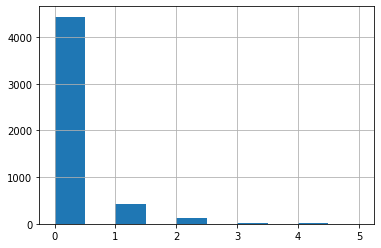

In [7]:
df['Insurance benefits'].hist();

Notes for preprocessing:
- Both values in the `Gender` column are equally represented;
- `Age` and `Salary` columns are normally distributed (mean close to median, max/min values within mean +/- 3 std). Typical age of a client is 30 years old, typical salary is around 40k USD;
- `Family members` number ranges from 0 to 6, also close to normal distribution;
- Most people didn't receive insurance benefits over the last five years. The target ranges from 0 to 5, classes are imbalanced.

## Data preprocessing

### Column names

In [8]:
columns = []
for name in df.columns.values:
    name = re.sub('([A-Z])', r' \1', name).lower().replace(' ', '_')[1:]
    columns.append(name)

In [9]:
df.columns = columns

In [10]:
df.head()

,gender,age,salary,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


### Data type change
As mentioned above, let's convert the `age` column into the integer type.

In [11]:
df['age'] = df['age'].astype(int)

### Duplicates
Let's check if any rows are duplicated.

In [12]:
df.duplicated().sum()

153

In [13]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [16]:
df.shape

(4847, 5)

## Theoretical proof

In this section we will provide a theoretical proof based on the equation of linear regression that the quality of a model doesn't change if we mask features. The features are multiplied by an invertible matrix P. 

Denote:

- $X$ — feature matrix (zero column consists of unities)

- $y$ — target vector

- $P$ — matrix by which the features are multiplied

- $w$ — linear regression weight vector (zero element is equal to the shift)

Predictions:

$$
a = Xw
$$

Training objective:

$$
\min_w d_2(Xw, y)
$$

Training formula:

$$
w = (X^T X)^{-1} X^T y
$$

The new weight vector after multiplying our features by P will look like this:

$$
w_P = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = (P^T\cdot (X^T  X)\cdot  P)^{-1} P^T X^T y = P^{-1} \cdot (X^T  X)^{-1} \cdot (P^T)^{-1}  P^T X^T y =
$$
$$
= P^{-1} \cdot (X^T  X)^{-1} \cdot E \cdot X^T y = P^{-1} \cdot (X^T  X)^{-1} \cdot  X^T y
$$
<br>

In the above formula we can identify the training formula for w: 

$$
w = (X^T X)^{-1} X^T y
$$
<br>

Let's transform it:
$$
w_P = P^{-1} w
$$

Now we'll make predictions using the formula for the new feature matrix and the weight vector
$$
a_P = X_P w_P = X P P^{-1} w = Xw = Xw
$$

That is
    
$$
a_P = a
$$

QED

## Linear regression implementation

In [14]:
class LinearRegressionImpl:
    def fit(self, X, y):
        n_samples = len(y)
        X = np.hstack((np.ones((n_samples, 1)), X))
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w0 = w[0]
        self.w = w[1:]
        return self
 
    def predict(self, X):
        return X @ self.w + self.w0  

## Data preparation

Let's separate out features and the target and create a random masking matrix (P). Its shape must be $4*4$ because when we multiply our features matrix (X) of shape $4847*4$ by P, the masked features matrix (X_masked) will have the same shape as X.

In [15]:
X = df.drop('insurance_benefits', axis=1)
y = df['insurance_benefits']
P = np.random.rand(4,4) # Obfuscation/masking matrix
X_masked = X@P
X_masked.shape

(4847, 4)

Let's test whether P is invertible.

In [22]:
np.linalg.inv(P)

array([[-2.40267075,  0.03028028,  1.97512819,  0.15679336],
       [-0.27535015,  1.08181464, -0.36962234,  0.4562798 ],
       [ 1.38313115,  0.52462742, -0.09425914, -1.8109074 ],
       [ 1.26081924, -1.67409134, -0.34236605,  1.88690607]])

The inverse of P exists, so it's not a singular matrix and can be used for the masking purpose.

## Algorithm testing
### Original features LR implementation

In [25]:
model_1 = LinearRegressionImpl()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_test)
r2_score(y_test, predictions_1)

0.4230772749214826

### Original features LR sklearn

In [26]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
predictions_2 = model_2.predict(X_test)
r2_score(y_test, predictions_2)

0.42307727492147296

### Masked features LR implementation

In [27]:
model_3 = LinearRegressionImpl()
X_train, X_test, y_train, y_test = train_test_split(X_masked, y, random_state=12345)
model_3.fit(X_train, y_train)
predictions_3 = model_3.predict(X_test)
r2_score(y_test, predictions_3)

0.4230772729159781

### Masked features LR sklearn

In [28]:
model_4 = LinearRegression()
model_4.fit(X_train, y_train)
predictions_4 = model_4.predict(X_test)
r2_score(y_test, predictions_4)

0.4230772749215429

All 4 models resulted in approximately the same R2 metric value. It means that our data masking technique and our implementation of the linear regression didn't change the quality of the model.

# Conclusion

In this project we have developed a data transforming algorithm for the Sure Tomorrow insurance company that makes it hard to recover personal information from the transformed data.
Steps:

1. First of all, we have familiarized ourselves with the data by performing the descriptive statistics;
2. In the data preprocessing step we have converted column names to lower case, converted the `age` column into the integer type and removed duplicates;
3. Next, we have provided a theoretical proof based on the equation of linear regression that the quality of a model doesn't change if we mask features;
4. We have then implemented our own linear regression class;
5. Next, data was prepared for testing and we have created a random P matrix and made sure it was invertible and finally multiplied our features X by P;
6. We have tested the algorithm and came to the following conclusion: all 4 models resulted in approximately the same R2 metric value. It means that **our data masking technique and our implementation of the linear regression didn't change the quality of the model**.